# Author: Kumar R.

### **Problem Statement:** I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.


In [1]:
#Import all the libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from patsy import dmatrices

In [2]:
#Load the dataset
data = sm.datasets.fair.load_pandas().data

In [3]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


### Description of Variables
**rate_marriage:** woman's rating of her marriage (1 = very poor, 5 = very good)

**age:** woman's age

**yrs_married:** number of years married

**children:** number of children

**religious:** woman's rating of how religious she is (1 = not religious, 4 = strongly religious)

**educ:** level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)

**occupation:** woman's occupation (1 = student, 2 = farming/semiskilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

**occupation_husb:** husband's occupation (same coding as above)

**affairs:** time spent in extra-marital affairs


In [4]:
print('Number of columns: ',len(data.columns))

Number of columns:  9


In [5]:
#Making all the observations more than 0 equal to 1 in affairs column.
data['affairs'] = (data.affairs > 0).astype(int)

In [6]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


0    4313
1    2053
Name: affairs, dtype: int64


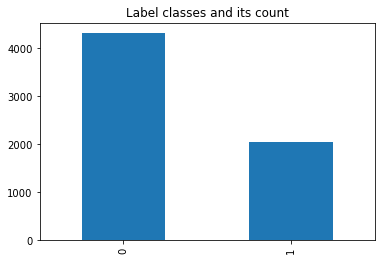

In [9]:
#Number of classes and its count
classes = data['affairs'].value_counts()
print(classes)
classes.plot(kind='bar', title='Label classes and its count')
plt.show()

The data set is an unbalanced label. Where the number of observations are not eaqual for both types of affairs.

## EDA (Exploratory Data Analysis)

In [11]:
value = data['rate_marriage'].value_counts()
explodes=(0.15,0,0,0,0.2)
label=['5.very good','4.good','3.neutral','2.poor','1.very poor']
color = ['r','g','b','o','y']

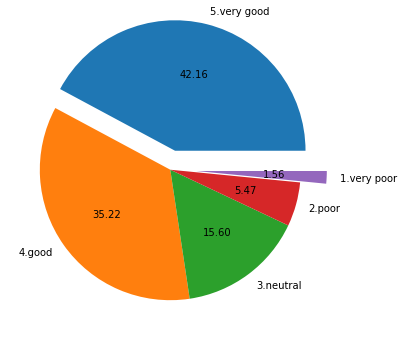

In [12]:
#Pie plot of Rate_marriage
ax = plt.figure(figsize=(6,6))
plt.pie(value, explode=explodes, labels=label, autopct = '%.2f')
plt.show()

From the above graph, we can observe that there were 42.16% of the total people who rate very good(5) for marragial rate.

There were 1:3 ratio people who gave 3 and 2 ratings for marrage respectively. And only 1.56% of the total people gave 1 rating. 

Text(0, 0.5, 'Frequency')

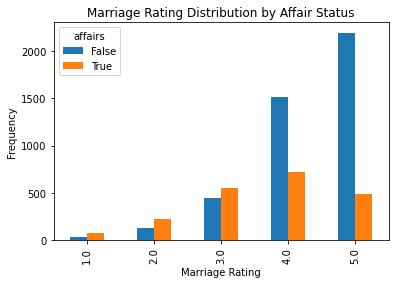

In [13]:
#Visualization of affair category based on marriage rating
pd.crosstab(data.rate_marriage, data.affairs.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

There were more than 2000 people who did not have afffairs and gave very good rating for marriage. 

Maximum of the people who had affirs gave **good (4)** rating for marriage which is almost half of the people who did not have affairs and belongs to the same group of people.

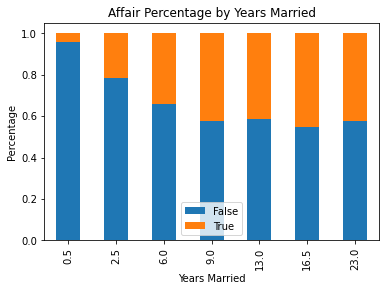

In [14]:
# Percentage of people with affairs vs yesrs of married. 
affair_yrs_married = pd.crosstab(data.yrs_married, data.affairs.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')
plt.legend()

From the above graph we can observe that the percentage of people who had affairs saw increasing rate as the years of marriage increased.

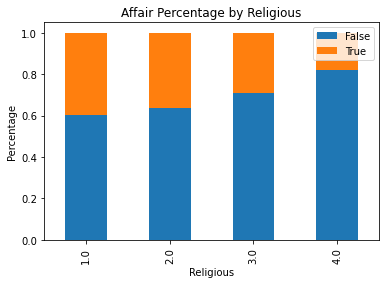

In [15]:
#Percentage of people with affairs vs Religious.
affair_yrs_married = pd.crosstab(data.religious, data.affairs.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Religious')
plt.xlabel('Religious')
plt.ylabel('Percentage')
plt.legend()
plt.show()

There were 40% of the people had affairs, which was maximum compared with other religious category, among the total people who were not more religius in life.

Many People who were more into religious did not have affairs in their life.  

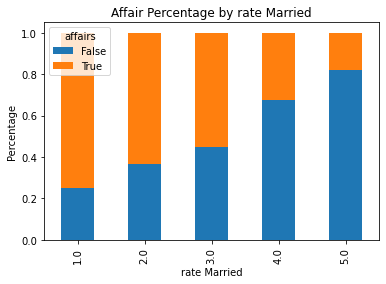

In [16]:
#Percentage of affairs vs marriage rate
affair_yrs_married = pd.crosstab(data.rate_marriage, data.affairs.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by rate Married')
plt.xlabel('rate Married')
plt.ylabel('Percentage')
plt.show()

Here we can conclude based on the graph that as the rate of marriage increases, the probability of people having affairs reduces.

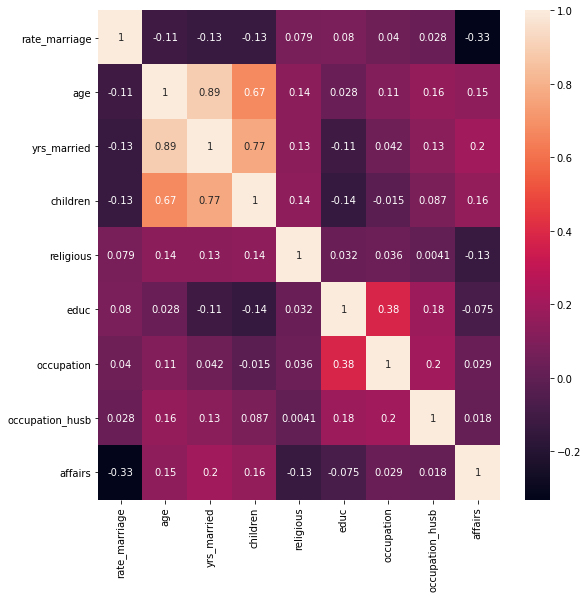

In [17]:
#Checking the correlation factor
cor = data.corr()
ax = plt.figure( figsize=(9,9))
sns.heatmap(cor, annot=True,cmap=None)
plt.show()

Based on the correation map displayed above, Since Age and Years of married features have more collinearity, I am deleting the AGE column as it is less correlated with the affairs comapred to years of married.

Also, Occupation of husband has only 0.018 correlation with affairs. Hence, Iam deleting this feature too.

In [18]:
#Dropping out AGE and OCCUPATION_HUSB feature.
column = ['age','occupation_husb']
data_new = data.drop(column, axis=1)

In [19]:
data_new.head()

,rate_marriage,yrs_married,children,religious,educ,occupation,affairs
0,3.0,9.0,3.0,3.0,17.0,2.0,1
1,3.0,13.0,3.0,1.0,14.0,3.0,1
2,4.0,2.5,0.0,1.0,16.0,3.0,1
3,4.0,16.5,4.0,3.0,16.0,5.0,1
4,5.0,9.0,1.0,1.0,14.0,3.0,1


In [20]:
label, feature = dmatrices('affairs ~ rate_marriage + yrs_married + children + religious + educ + C(occupation) ',data_new, return_type="dataframe")

In [21]:
feature.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'rate_marriage', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [22]:
#Rename the columns
feature = feature.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [23]:
label = np.ravel(label)

In [24]:
#Model training
import warnings
warnings.filterwarnings('ignore')
#Splittig the data into training and testing dataset.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature, label, test_size=0.2, random_state=179)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#training the model
model.fit(x_train,y_train)
train_score = model.score(x_train,y_train)
test_score = model.score(x_test,y_test)
    
print(f"test score: {test_score}, train score: {train_score}")

test score: 0.7566718995290423, train score: 0.7166142969363708


In [25]:
#Checking the quality of the dataset to know the best score we can expect from the model.
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, feature, label, cv=10)

print("Minimum accuracy: ",np.min(score))
print("Average accuracy: ",np.average(score))
print("Maximum accuracy: ",np.max(score))

Minimum accuracy:  0.6923076923076923
Average accuracy:  0.7221209383608306
Maximum accuracy:  0.7468553459119497


In [26]:
#Predicting the answers for test dataset
pred = model.predict(x_test)

In [27]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test, pred)
print(m)

[[816  70]
 [240 148]]


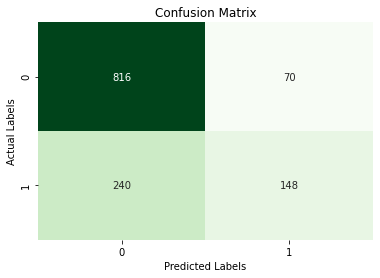

In [28]:
#plotting the confusion matrix tabel
ax = plt.subplot()
sns.heatmap(m,annot=True, ax=ax,fmt='g', cbar=False, cmap='Greens')
#labels and title of the graph
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [29]:
#Classification report to check the precision and recall
from sklearn.metrics import classification_report
report =  classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.92      0.84       886
         1.0       0.68      0.38      0.49       388

    accuracy                           0.76      1274
   macro avg       0.73      0.65      0.66      1274
weighted avg       0.74      0.76      0.73      1274



In [30]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix
auc = roc_auc_score(y_test, pred)
print(f'Roc_Auc_Score : {roc_auc_score(y_test,pred)}')

Roc_Auc_Score : 0.6512182634800214


In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, pred)

In [32]:
print('False Positive Rate: ',fpr)
print('True Positive Rate: ',tpr)
print('Threshold value: ',threshold)

False Positive Rate:  [0.         0.07900677 1.        ]
True Positive Rate:  [0.        0.3814433 1.       ]
Threshold value:  [2. 1. 0.]


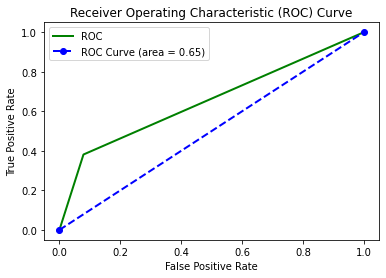

In [33]:
plt.plot(fpr, tpr, 'g', linewidth=2, label='ROC')
plt.plot([0,1],[0,1],'bo--', linewidth=2, label = 'ROC Curve (area = %0.2f)'%auc )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

WE can trust our model as the ROC curve is not falling below the skill line. i.e, The true positive rate is not coming less then the false positive rate

In [34]:
#Deploy the model using pickle
import pickle
pickle.dump(model, open('Logistic_regression.model', 'wb'))

# Done!